In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import datetime
#%matplotlib inline

https://www.kaggle.com/datasets/jaganadhg/house-hold-energy-data

In [2]:
os.listdir('./house-hold-energy-data/')

['D202.csv', 'D202.xlsx']

Loading in the dataset

In [3]:
df = pd.read_csv('./house-hold-energy-data/D202.csv')
df

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,10/24/2018,22:45,22:59,0.02,kWh,$0.00,NaN
70364,Electric usage,10/24/2018,23:00,23:14,0.03,kWh,$0.01,NaN
70365,Electric usage,10/24/2018,23:15,23:29,0.03,kWh,$0.01,NaN
70366,Electric usage,10/24/2018,23:30,23:44,0.03,kWh,$0.01,NaN


Converting datatypes

In [4]:
df = df.convert_dtypes() # Converting the datatypes from object to something else
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70368 entries, 0 to 70367
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TYPE        70368 non-null  string 
 1   DATE        70368 non-null  string 
 2   START TIME  70368 non-null  string 
 3   END TIME    70368 non-null  string 
 4   USAGE       70368 non-null  Float64
 5   UNITS       70368 non-null  string 
 6   COST        70368 non-null  string 
 7   NOTES       0 non-null      Int64  
dtypes: Float64(1), Int64(1), string(6)
memory usage: 4.4 MB


Converting cost to a numeric value

In [5]:
df['COST'] = df['COST'].apply(lambda x: float(x.replace("$","")))
df['COST']

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
70363    0.00
70364    0.01
70365    0.01
70366    0.01
70367    0.01
Name: COST, Length: 70368, dtype: float64

Creating a timestamp

In [6]:
def func(input):
    input_len = len(input)
    if input_len == 4:
        return "0" + input + ":00"
    else:
        return input + ":00"

In [7]:
df['START TIME'].apply(func)

0        00:00:00
1        00:15:00
2        00:30:00
3        00:45:00
4        01:00:00
           ...   
70363    22:45:00
70364    23:00:00
70365    23:15:00
70366    23:30:00
70367    23:45:00
Name: START TIME, Length: 70368, dtype: object

In [8]:
df['TIMESTAMP'] = df['DATE'] + ' ' + df['START TIME'].apply(func)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['TIMESTAMP']

0       2016-10-22 00:00:00
1       2016-10-22 00:15:00
2       2016-10-22 00:30:00
3       2016-10-22 00:45:00
4       2016-10-22 01:00:00
                ...        
70363   2018-10-24 22:45:00
70364   2018-10-24 23:00:00
70365   2018-10-24 23:15:00
70366   2018-10-24 23:30:00
70367   2018-10-24 23:45:00
Name: TIMESTAMP, Length: 70368, dtype: datetime64[ns]

In [9]:
df.head(50)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,TIMESTAMP
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,0.00,<NA>,2016-10-22 00:00:00
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,0.00,<NA>,2016-10-22 00:15:00
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,0.00,<NA>,2016-10-22 00:30:00
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,0.00,<NA>,2016-10-22 00:45:00
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,0.00,<NA>,2016-10-22 01:00:00
5,Electric usage,10/22/2016,1:15,1:29,0.01,kWh,0.00,<NA>,2016-10-22 01:15:00
6,Electric usage,10/22/2016,1:30,1:44,0.01,kWh,0.00,<NA>,2016-10-22 01:30:00
7,Electric usage,10/22/2016,1:45,1:59,0.01,kWh,0.00,<NA>,2016-10-22 01:45:00
8,Electric usage,10/22/2016,2:00,2:14,0.02,kWh,0.00,<NA>,2016-10-22 02:00:00
9,Electric usage,10/22/2016,2:15,2:29,0.02,kWh,0.00,<NA>,2016-10-22 02:15:00


**Converting the datasets into hour, day, weeks, months**

In [10]:
df_hour = df[['TIMESTAMP','USAGE', 'COST']].resample("1H", on="TIMESTAMP").sum()
df_hour

,USAGE,COST
TIMESTAMP,,
2016-10-22 00:00:00,0.04,0.00
2016-10-22 01:00:00,0.04,0.00
2016-10-22 02:00:00,0.08,0.00
2016-10-22 03:00:00,0.04,0.00
2016-10-22 04:00:00,0.04,0.00
...,...,...
2018-10-24 19:00:00,0.12,0.04
2018-10-24 20:00:00,0.12,0.04
2018-10-24 21:00:00,0.12,0.04


In [11]:
df_day = df[['TIMESTAMP','USAGE', 'COST']].resample("1D", on="TIMESTAMP").sum()
df_day

,USAGE,COST
TIMESTAMP,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2018-10-20,8.0,1.68
2018-10-21,1.12,0.16
2018-10-22,0.64,0.04


In [12]:
df_week = df[['TIMESTAMP','USAGE', 'COST']].resample("1W", on="TIMESTAMP").sum()
df_week

,USAGE,COST
TIMESTAMP,,
2016-10-23,27.84,4.96
2016-10-30,48.92,8.64
2016-11-06,87.44,16.20
2016-11-13,66.76,12.16
2016-11-20,78.16,13.96
...,...,...
2018-09-30,58.76,12.60
2018-10-07,61.8,13.24
2018-10-14,55.2,11.88


In [13]:
df_month = df[['TIMESTAMP','USAGE', 'COST']].resample("1M", on="TIMESTAMP").sum()
df_month

,USAGE,COST
TIMESTAMP,,
2016-10-31,85.6,15.24
2016-11-30,404.36,73.56
2016-12-31,624.52,122.30
2017-01-31,742.4,145.38
2017-02-28,458.12,85.78
2017-03-31,346.68,68.44
2017-04-30,212.72,41.28
2017-05-31,229.08,46.04
2017-06-30,232.04,46.52


In [14]:
df_month.index

DatetimeIndex(['2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31',
               '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31',
               '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30',
               '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31',
               '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31',
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31'],
              dtype='datetime64[ns]', name='TIMESTAMP', freq='M')

## EDA

In [15]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [16]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Cost and Usage')

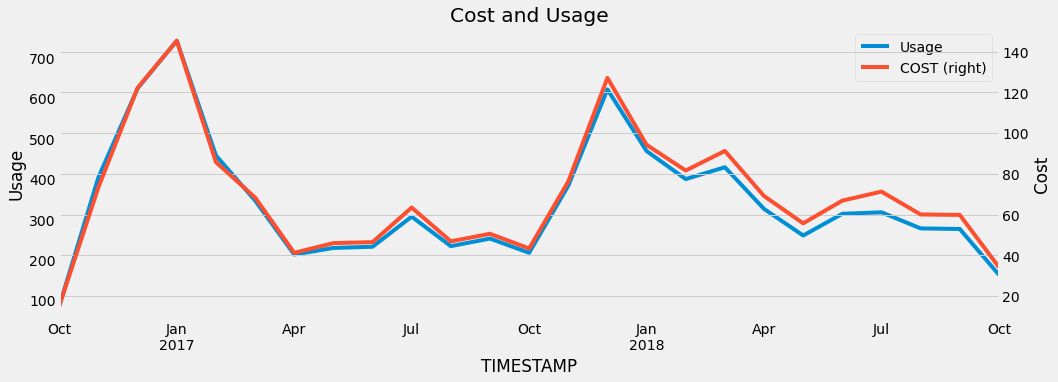

In [17]:
plt.figure(figsize=(15,5))

df_month['USAGE'].plot(label="Usage", legend=True)
plt.ylabel('Usage')
df_month['COST'].plot(secondary_y=True, label="COST", legend=True)
plt.ylabel('Cost')
plt.title('Cost and Usage')

#plt.axvline('2018-02-28', linestyle='--')

In [313]:
df_month['USAGE']

TIMESTAMP
2016-10-31    85.60
2016-11-30   404.36
2016-12-31   624.52
2017-01-31   742.40
2017-02-28   458.12
2017-03-31   346.68
2017-04-30   212.72
2017-05-31   229.08
2017-06-30   232.04
2017-07-31   306.64
2017-08-31   233.56
2017-09-30   252.28
2017-10-31   217.04
2017-11-30   383.24
2017-12-31   621.80
2018-01-31   469.16
2018-02-28   399.64
2018-03-31   429.00
2018-04-30   325.80
2018-05-31   259.88
2018-06-30   313.64
2018-07-31   317.36
2018-08-31   277.52
2018-09-30   276.00
2018-10-31   162.64
Freq: M, Name: USAGE, dtype: Float64

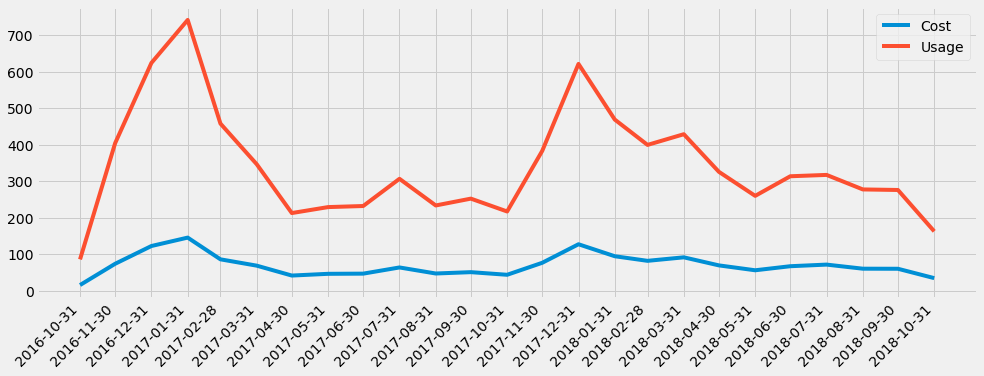

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_month.index, df_month['COST'].values, label='Cost')
plt.plot(df_month.index, df_month['USAGE'].tolist(), label='Usage')
plt.xticks(df_month.index, rotation=45, ha='right')
plt.legend()

In [19]:
df_month['COST']

TIMESTAMP
2016-10-31     15.24
2016-11-30     73.56
2016-12-31    122.30
2017-01-31    145.38
2017-02-28     85.78
2017-03-31     68.44
2017-04-30     41.28
2017-05-31     46.04
2017-06-30     46.52
2017-07-31     63.49
2017-08-31     46.92
2017-09-30     50.60
2017-10-31     43.40
2017-11-30     76.28
2017-12-31    127.14
2018-01-31     94.28
2018-02-28     81.67
2018-03-31     91.28
2018-04-30     69.16
2018-05-31     55.76
2018-06-30     66.89
2018-07-31     71.32
2018-08-31     60.10
2018-09-30     59.88
2018-10-31     34.24
Freq: M, Name: COST, dtype: float64

In [20]:
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
matplotlib.rcParams['figure.figsize'] = [25.0, 15.0]

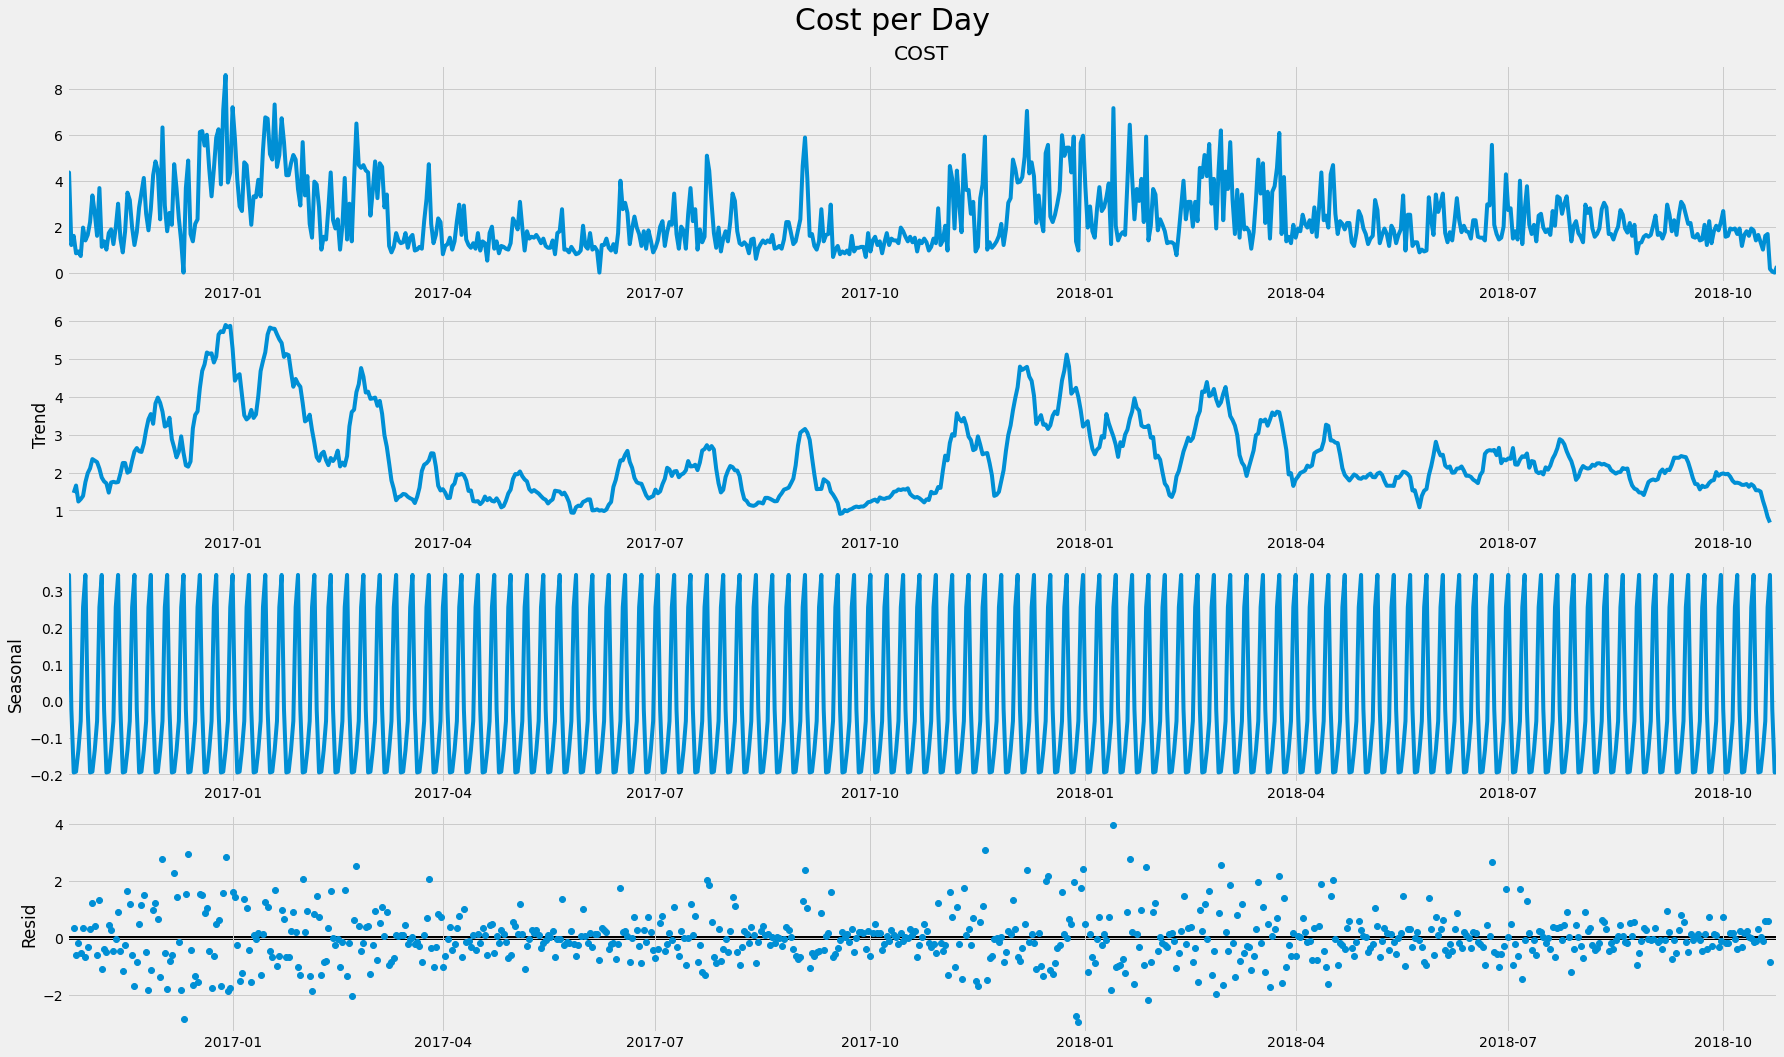

In [21]:
decomposition = sm.tsa.seasonal_decompose(df_day['COST'], model = 'additive')
fig = decomposition.plot()
fig.suptitle('Cost per Day', size=30)
fig.tight_layout()

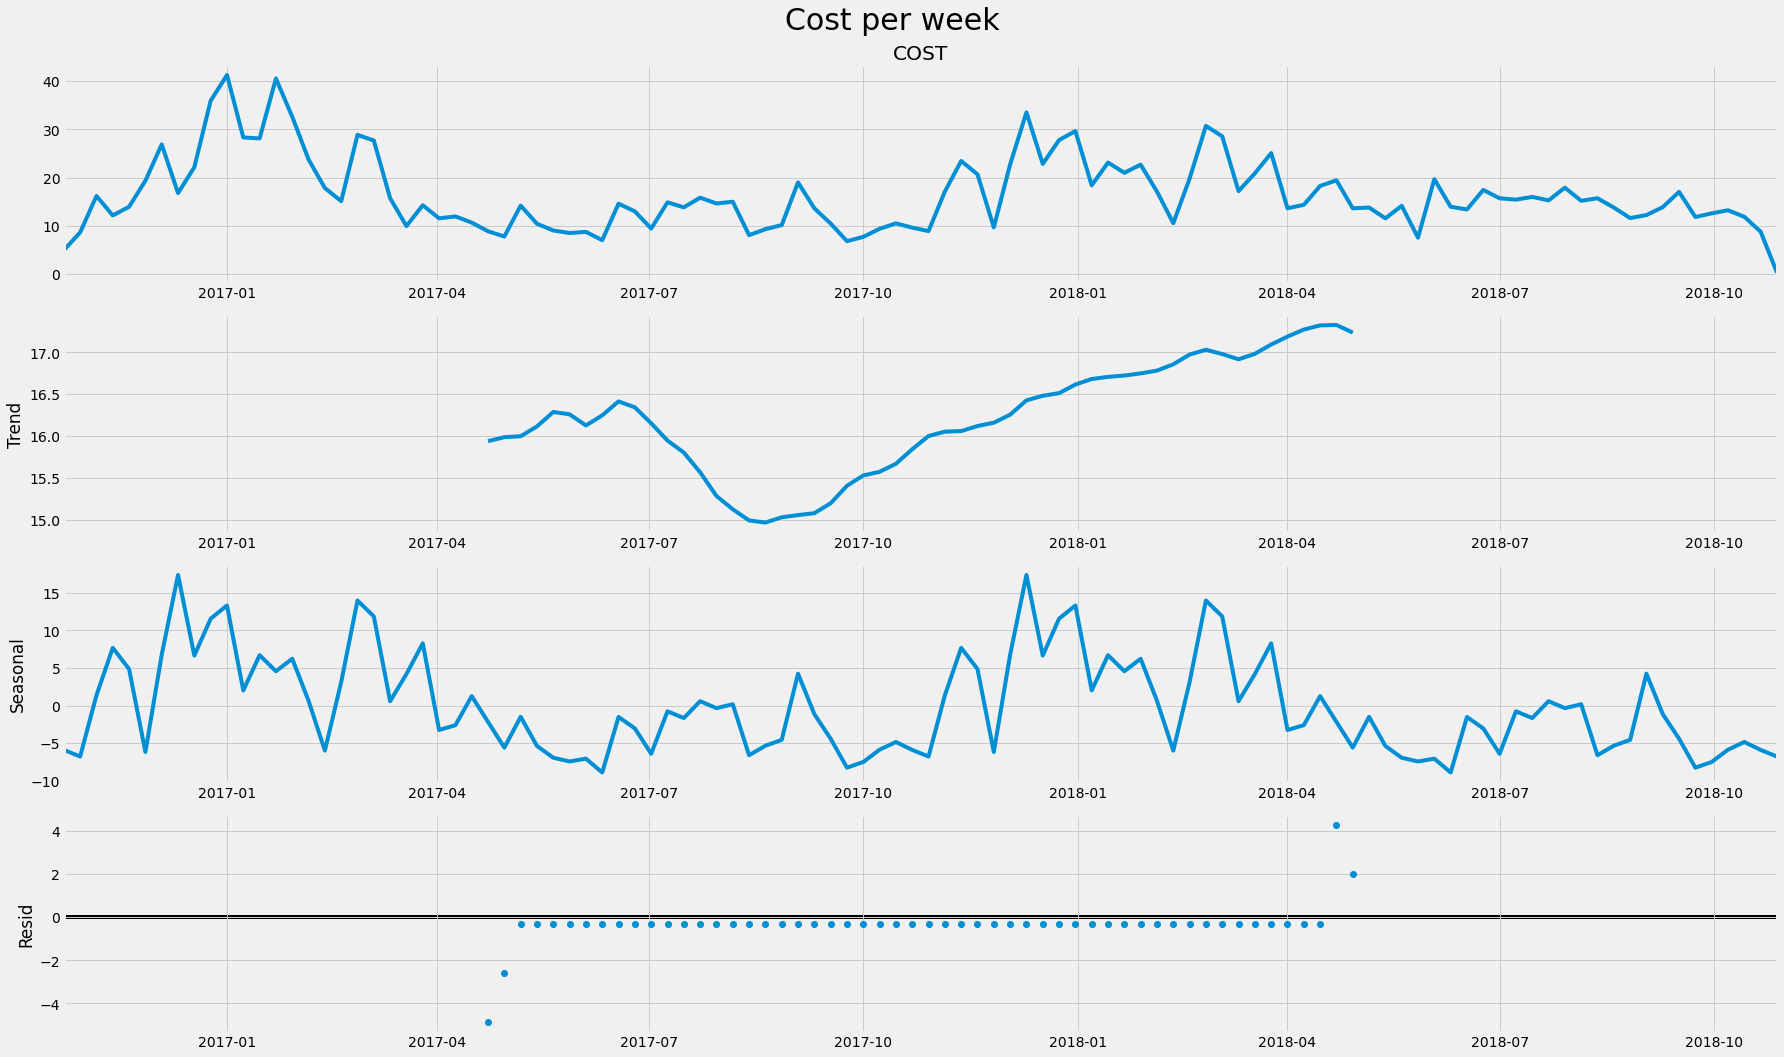

In [22]:
decomposition = sm.tsa.seasonal_decompose(df_week['COST'], model = 'additive')
fig = decomposition.plot()
fig.suptitle('Cost per week', size=30)
fig.tight_layout()

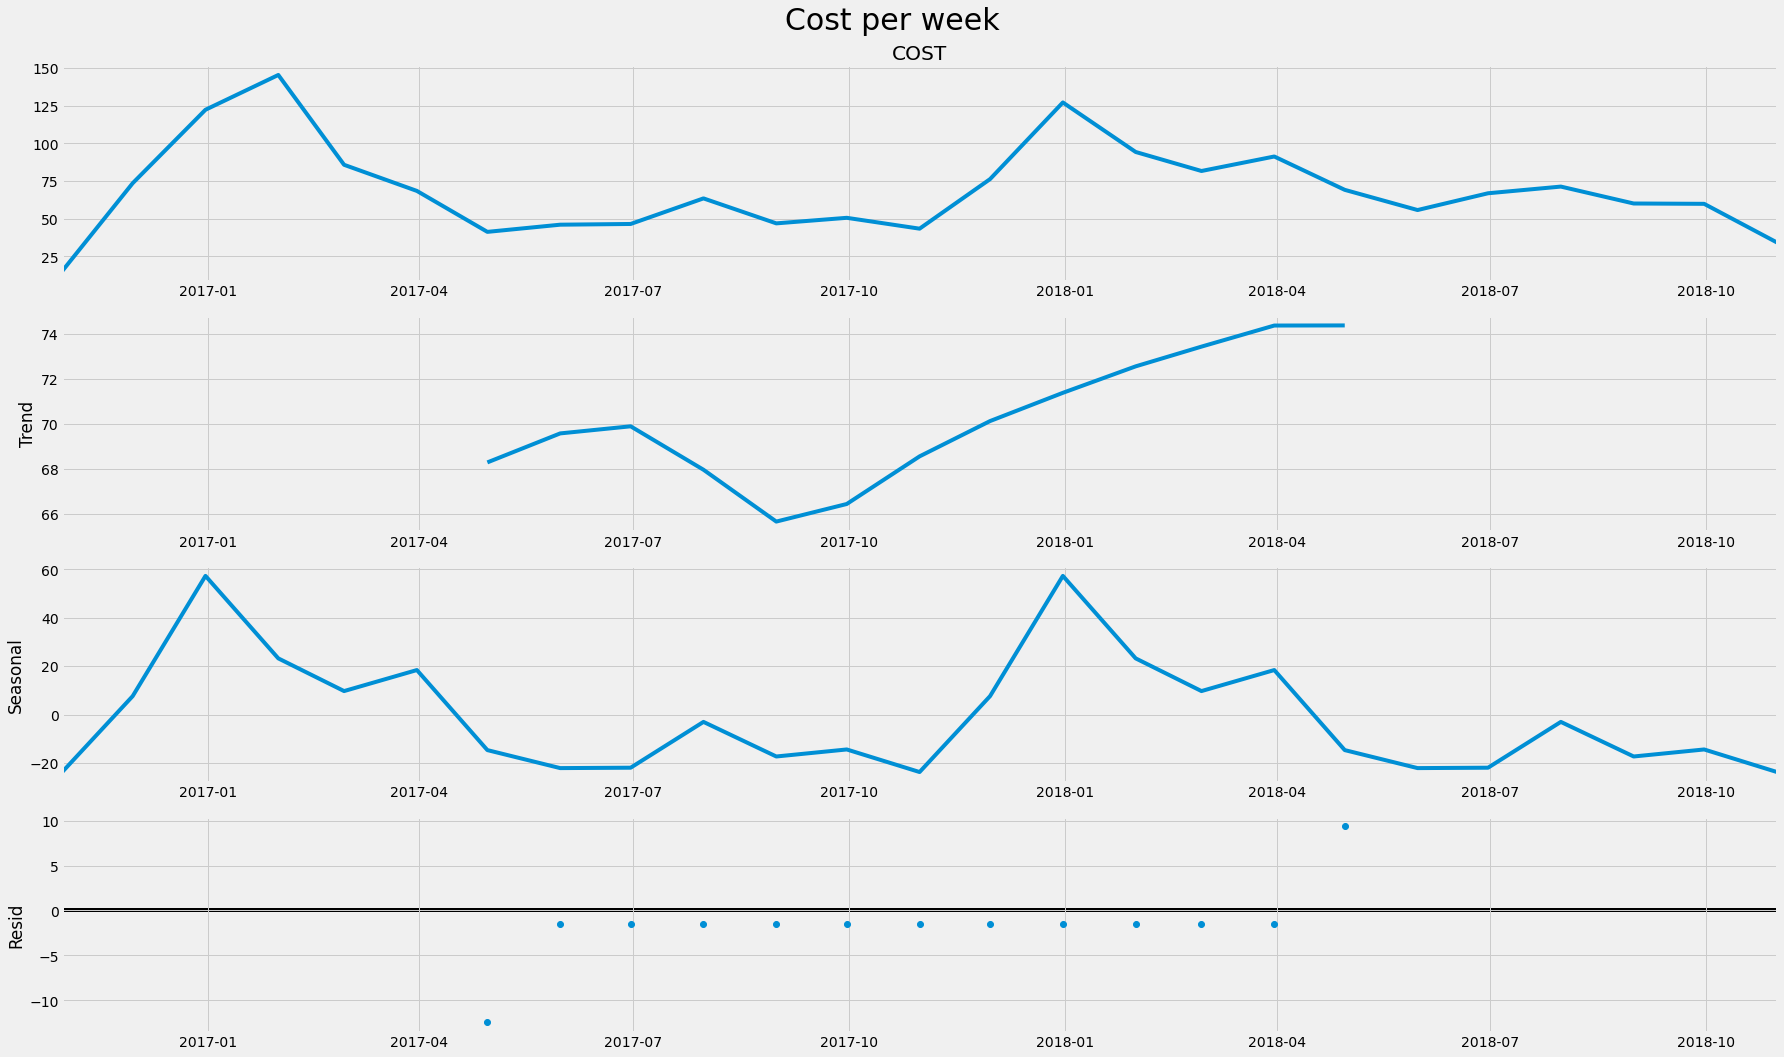

In [23]:
decomposition = sm.tsa.seasonal_decompose(df_month['COST'], model = 'additive')
fig = decomposition.plot()
fig.suptitle('Cost per week', size=30)
fig.tight_layout()

In [24]:
#(load['2012-07-01':'2012-12-31'], model = 'additive')

## Feature Engineering

Creating hour, month, dayofweek, is_weekend

In [25]:
# ts_data['hour'] = [ts_data.index[i].hour for i in range(len(ts_data))]
# ts_data['month'] = [ts_data.index[i].month for i in range(len(ts_data))]
# ts_data['dayofweek'] = [ts_data.index[i].day for i in range(len(ts_data))]

In [26]:
df_day

,USAGE,COST
TIMESTAMP,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2018-10-20,8.0,1.68
2018-10-21,1.12,0.16
2018-10-22,0.64,0.04


In [27]:
# df_day['DAY'] = [df_day.index[i].day for i in range(df_day.shape[0])]
# df_day['WEEK'] = [df_day.index[i].week for i in range(df_day.shape[0])]
# df_day['MONTH'] = [df_day.index[i].month for i in range(df_day.shape[0])]
df_day

,USAGE,COST
TIMESTAMP,,
2016-10-22,4.52,0.60
2016-10-23,23.32,4.36
2016-10-24,7.16,1.20
2016-10-25,8.68,1.60
2016-10-26,5.04,0.84
...,...,...
2018-10-20,8.0,1.68
2018-10-21,1.12,0.16
2018-10-22,0.64,0.04


**Adding Lag Features**

In [28]:
def generated_lagged_features(df, feature, max_lag):
    for t in range(1, max_lag + 1):
        df[feature + "_lag" + str(t)] = df[feature].shift(t)

In [29]:
df_day_copy = df_day.copy()

In [30]:
generated_lagged_features(df_day_copy, 'USAGE', 14)

In [31]:
df_day_copy

,USAGE,COST,USAGE_lag1,USAGE_lag2,USAGE_lag3,USAGE_lag4,USAGE_lag5,USAGE_lag6,USAGE_lag7,USAGE_lag8,USAGE_lag9,USAGE_lag10,USAGE_lag11,USAGE_lag12,USAGE_lag13,USAGE_lag14
TIMESTAMP,,,,,,,,,,,,,,,,
2016-10-22,4.52,0.60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2016-10-23,23.32,4.36,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2016-10-24,7.16,1.20,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2016-10-25,8.68,1.60,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2016-10-26,5.04,0.84,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-20,8.0,1.68,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,8.88
2018-10-21,1.12,0.16,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32
2018-10-22,0.64,0.04,1.12,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36


Adding a rolling average over the last 14 days

In [32]:
df_day_copy['USAGE_rol_mean'] = df_day_copy['USAGE'].rolling(window=14).mean()
df_day_copy

,USAGE,COST,USAGE_lag1,USAGE_lag2,USAGE_lag3,USAGE_lag4,USAGE_lag5,USAGE_lag6,USAGE_lag7,USAGE_lag8,USAGE_lag9,USAGE_lag10,USAGE_lag11,USAGE_lag12,USAGE_lag13,USAGE_lag14,USAGE_rol_mean
TIMESTAMP,,,,,,,,,,,,,,,,,
2016-10-22,4.52,0.60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2016-10-23,23.32,4.36,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2016-10-24,7.16,1.20,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2016-10-25,8.68,1.60,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
2016-10-26,5.04,0.84,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-20,8.0,1.68,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,8.88,7.448571
2018-10-21,1.12,0.16,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,6.934286
2018-10-22,0.64,0.04,1.12,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,6.311429


Rolling variance over the last 14 days

In [33]:
df_day_copy['USAGE_rol_var'] = df_day_copy['USAGE'].rolling(window=14).var()
df_day_copy

,USAGE,COST,USAGE_lag1,USAGE_lag2,USAGE_lag3,USAGE_lag4,USAGE_lag5,USAGE_lag6,USAGE_lag7,USAGE_lag8,USAGE_lag9,USAGE_lag10,USAGE_lag11,USAGE_lag12,USAGE_lag13,USAGE_lag14,USAGE_rol_mean,USAGE_rol_var
TIMESTAMP,,,,,,,,,,,,,,,,,,
2016-10-22,4.52,0.60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-23,23.32,4.36,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-24,7.16,1.20,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-25,8.68,1.60,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-26,5.04,0.84,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-20,8.0,1.68,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,8.88,7.448571,1.934075
2018-10-21,1.12,0.16,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,6.934286,4.671657
2018-10-22,0.64,0.04,1.12,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,6.311429,6.848782


In [34]:
df_day_copy.head(10)

,USAGE,COST,USAGE_lag1,USAGE_lag2,USAGE_lag3,USAGE_lag4,USAGE_lag5,USAGE_lag6,USAGE_lag7,USAGE_lag8,USAGE_lag9,USAGE_lag10,USAGE_lag11,USAGE_lag12,USAGE_lag13,USAGE_lag14,USAGE_rol_mean,USAGE_rol_var
TIMESTAMP,,,,,,,,,,,,,,,,,,
2016-10-22,4.52,0.60,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-23,23.32,4.36,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-24,7.16,1.20,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-25,8.68,1.60,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-26,5.04,0.84,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-27,5.32,0.92,5.04,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-28,4.64,0.72,5.32,5.04,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-29,10.64,1.96,4.64,5.32,5.04,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN
2016-10-30,7.44,1.40,10.64,4.64,5.32,5.04,8.68,7.16,23.32,4.52,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN


### Creating training, testing, and validation sets

In [35]:
days_df = df_day_copy.dropna()
days_df

,USAGE,COST,USAGE_lag1,USAGE_lag2,USAGE_lag3,USAGE_lag4,USAGE_lag5,USAGE_lag6,USAGE_lag7,USAGE_lag8,USAGE_lag9,USAGE_lag10,USAGE_lag11,USAGE_lag12,USAGE_lag13,USAGE_lag14,USAGE_rol_mean,USAGE_rol_var
TIMESTAMP,,,,,,,,,,,,,,,,,,
2016-11-05,19.64,3.68,8.28,14.16,18.2,11.44,8.84,7.44,10.64,4.64,5.32,5.04,8.68,7.16,23.32,4.52,10.914286,33.967473
2016-11-06,6.88,1.12,19.64,8.28,14.16,18.2,11.44,8.84,7.44,10.64,4.64,5.32,5.04,8.68,7.16,23.32,9.740000,21.895815
2016-11-07,7.28,1.36,6.88,19.64,8.28,14.16,18.2,11.44,8.84,7.44,10.64,4.64,5.32,5.04,8.68,7.16,9.748571,21.849213
2016-11-08,6.04,1.00,7.28,6.88,19.64,8.28,14.16,18.2,11.44,8.84,7.44,10.64,4.64,5.32,5.04,8.68,9.560000,22.781046
2016-11-09,9.04,1.72,6.04,7.28,6.88,19.64,8.28,14.16,18.2,11.44,8.84,7.44,10.64,4.64,5.32,5.04,9.845714,21.142365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-20,8.0,1.68,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,8.88,7.448571,1.934075
2018-10-21,1.12,0.16,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,8.32,6.934286,4.671657
2018-10-22,0.64,0.04,1.12,8.0,7.76,4.76,5.88,7.72,6.64,8.4,8.84,8.28,7.88,7.48,4.96,9.36,6.311429,6.848782


In [36]:
# 80% Training, 10% testing, 10% validation
train_size = int(days_df.shape[0] * 0.8)
test_size = int(days_df.shape[0] * 0.1)
valid_size = days_df.shape[0] - train_size - test_size

print(f'Training Size: {train_size}, Testing Size: {test_size}, Validation Size: {valid_size}')

df_train = days_df[:train_size]
df_test = days_df[train_size:train_size + test_size]
df_valid = days_df[train_size + test_size:]

Training Size: 575, Testing Size: 71, Validation Size: 73


**Splitting and scaling the data**

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
### Scalers
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))

# Columns
explanatory_cols = days_df.columns[df_train.columns != 'COST']
response_col = 'COST'

### Creating datasets
X_train = df_train[explanatory_cols]
y_train = df_train[response_col].values.reshape(-1,1)
X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)

X_test = df_test[explanatory_cols]
y_test = df_test[response_col].values.reshape(-1,1)
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

X_val = df_valid[explanatory_cols]
y_val = df_valid[response_col].values.reshape(-1,1)
X_val_scaled = X_scaler.transform(X_val)
y_val_scaled = y_scaler.transform(y_val)

## Modeling

**Predicting each observation independent of each other**

Ideas for problems:
- Predict next weeks cost and usage
- Predict next months cost and usage

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [69]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)

y_pred = reg.predict(X_test_scaled)
y_pred_inverse = y_scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 0.26719975759259595


**Visualizing the predictions**

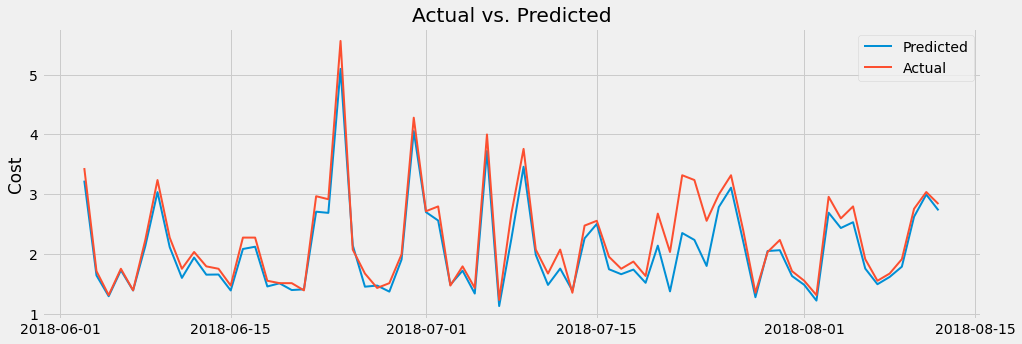

In [43]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [42]:
(y_pred_inverse - y_test).sum()

-12.610220180538121

Predicted 12 dollars less in energy than actually last week

**Predicting each observation using the previous predictions**

In [73]:
predictions = [] # Saving the predictions
temp_list = X_test_scaled[0].tolist() # Start with the initial list

# Loop through as many test examples as there are
for _ in range(X_test_scaled.shape[0]):
    y_pred = reg.predict([temp_list]) # Make a prediction
    predictions.append(y_pred[0]) # Add the prediction to a list
    temp_list.pop(0) # Remove the first prediction
    temp_list.append(y_pred[0][0]) # Add the last prediction to the new list 
    
y_pred_inverse = y_scaler.inverse_transform(predictions)
rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 1.2033532902992954


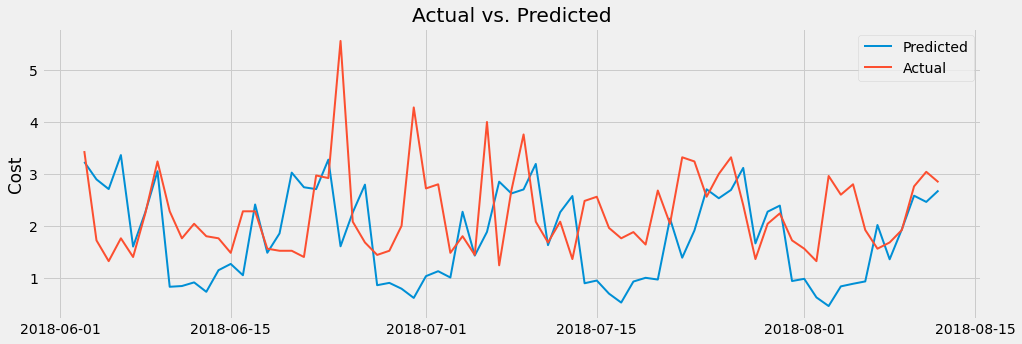

In [74]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [75]:
(y_pred_inverse - y_test).sum()

-32.33666376594178

Predicted 32 dollars less than actual

**XGBoost**

In [76]:
from xgboost import XGBRegressor

In [80]:
xgb = XGBRegressor(tree_method='gpu_hist', 
                  objective='reg:squarederror',
                  gpu_id=0)

xgb.fit(X_train_scaled, 
        y_train_scaled,
        eval_set=[(X_val_scaled, y_val_scaled)],
        early_stopping_rounds=10, 
        eval_metric='rmse') 
### Make predictions on the testing data
y_pred = xgb.predict(X_test_scaled)

[0]	validation_0-rmse:0.76594
[1]	validation_0-rmse:0.53482
[2]	validation_0-rmse:0.37527
[3]	validation_0-rmse:0.26373
[4]	validation_0-rmse:0.18626
[5]	validation_0-rmse:0.13157
[6]	validation_0-rmse:0.09620
[7]	validation_0-rmse:0.07154
[8]	validation_0-rmse:0.05703
[9]	validation_0-rmse:0.04611
[10]	validation_0-rmse:0.03962
[11]	validation_0-rmse:0.03605
[12]	validation_0-rmse:0.03524
[13]	validation_0-rmse:0.03475
[14]	validation_0-rmse:0.03450
[15]	validation_0-rmse:0.03452
[16]	validation_0-rmse:0.03421
[17]	validation_0-rmse:0.03453
[18]	validation_0-rmse:0.03359
[19]	validation_0-rmse:0.03359
[20]	validation_0-rmse:0.03371
[21]	validation_0-rmse:0.03398
[22]	validation_0-rmse:0.03397
[23]	validation_0-rmse:0.03406
[24]	validation_0-rmse:0.03407
[25]	validation_0-rmse:0.03413
[26]	validation_0-rmse:0.03349
[27]	validation_0-rmse:0.03349
[28]	validation_0-rmse:0.03359
[29]	validation_0-rmse:0.03335
[30]	validation_0-rmse:0.03336
[31]	validation_0-rmse:0.03338
[32]	validation_0-

In [83]:
y_pred_inverse = y_scaler.inverse_transform(y_pred.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 0.23296435948511493


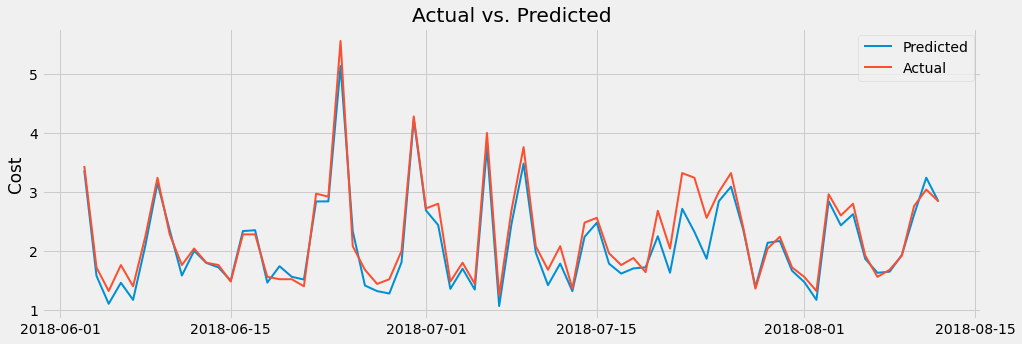

In [84]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [85]:
(y_pred_inverse - y_test).sum()

-9.470505981445317

Off by 9 dollars

**Predicting each observation using the previous predictions**

In [92]:
predictions = [] # Saving the predictions
temp_list = X_test_scaled[0].tolist() # Start with the initial list

# Loop through as many test examples as there are
for _ in range(X_test_scaled.shape[0]):
    y_pred = xgb.predict(np.array([temp_list])) # Make a prediction
    predictions.append(y_pred) # Add the prediction to a list
    temp_list.pop(0) # Remove the first prediction
    temp_list.append(y_pred[0]) # Add the last prediction to the new list 
    
y_pred_inverse = y_scaler.inverse_transform(predictions)
rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 1.230971812094882


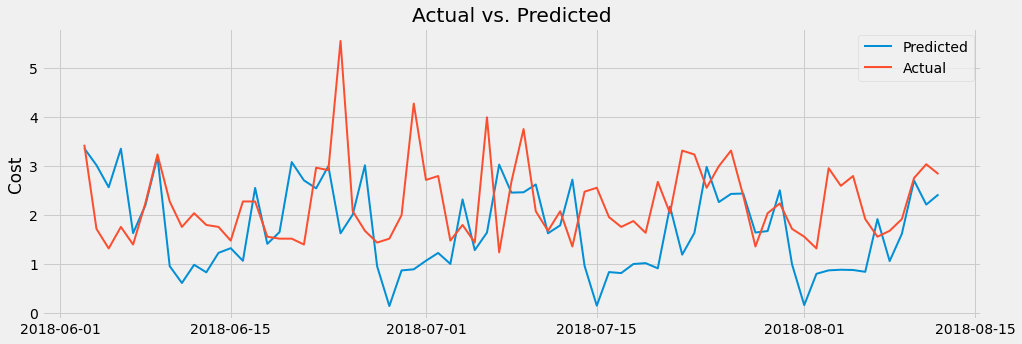

In [93]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [94]:
(y_pred_inverse - y_test).sum()

-37.33963275283576

Off by 37 dollars

### TensorFlow

In [101]:
X_train_scaled_new = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled_new = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
X_val_scaled_new = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])

In [145]:
X_train_scaled_new.shape

(575, 1, 17)

In [198]:
#import Keras
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, GRU
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


early_stopping = EarlyStopping(patience=5, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0.0001, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=True, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.000001, # Lower bound of learning rate
                              patience=10, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)


model = Sequential()
model.add(GRU(32, batch_input_shape=(1, X_train_scaled_new.shape[1], X_train_scaled_new.shape[2]), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=RMSprop())
history = model.fit(X_train_scaled_new, 
          y_train_scaled, 
          epochs=100, 
          batch_size=1, 
          verbose=1, 
          callbacks=[early_stopping, reduce_lr],
          validation_data=(X_val_scaled_new, y_val_scaled),
          shuffle=False)

Epoch 1/100
575/575 [==============================] - 3s 4ms/step - loss: 0.0616 - val_loss: 0.0206
Epoch 2/100
575/575 [==============================] - 2s 4ms/step - loss: 0.0188 - val_loss: 0.0074
Epoch 3/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0146 - val_loss: 0.0029
Epoch 4/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0131 - val_loss: 0.0025
Epoch 5/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0108 - val_loss: 0.0014
Epoch 6/100
575/575 [==============================] - 2s 4ms/step - loss: 0.0092 - val_loss: 0.0031
Epoch 7/100
575/575 [==============================] - 2s 4ms/step - loss: 0.0098 - val_loss: 0.0019
Epoch 8/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0079 - val_loss: 0.0057
Epoch 9/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0073 - val_loss: 0.0013
Epoch 10/100
575/575 [==============================] - 2s 3ms/step - loss: 0.0076 - val_lo

In [199]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (1, 32)                   4896      
_________________________________________________________________
dropout (Dropout)            (1, 32)                   0         
_________________________________________________________________
dense_5 (Dense)              (1, 1)                    33        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [200]:
y_pred = model.predict(X_test_scaled_new, batch_size=1)

In [201]:
y_pred_inverse = y_scaler.inverse_transform(y_pred)

rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 0.19896520177044608


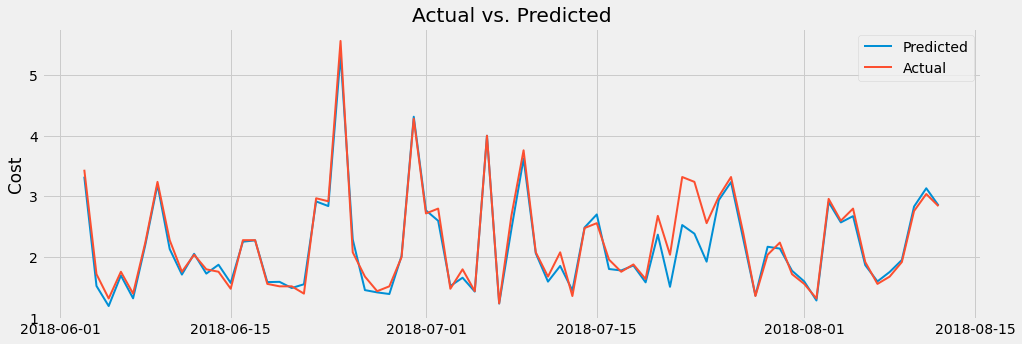

In [202]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [203]:
(y_pred_inverse - y_test).sum()

-5.0273782300949135

Off by 7 dollars

**Predicting each observation using the previous predictions**

In [204]:
X_train_scaled_new[0]

array([[-0.01107754, -0.58308157, -0.28700906, -0.0835851 , -0.42396777,
        -0.55488419, -0.62537764, -0.46424975, -0.76636455, -0.73212487,
        -0.74622356, -0.56294058, -0.63947633,  0.17421954, -0.77240685,
        -0.46523372, -0.3978731 ]])

In [205]:
model.predict(X_train_scaled_new[0].reshape(X_train_scaled_new[0].shape[0], 1, X_train_scaled_new[0].shape[1]))

array([[-0.09457438]], dtype=float32)

In [206]:
temp_list = X_train_scaled_new[0][0].tolist()
temp_list

[-0.011077542799597162,
 -0.5830815709969789,
 -0.2870090634441087,
 -0.08358509566968786,
 -0.4239677744209467,
 -0.5548841893252769,
 -0.6253776435045317,
 -0.46424974823766363,
 -0.7663645518630413,
 -0.7321248741188318,
 -0.7462235649546828,
 -0.5629405840886204,
 -0.6394763343403826,
 0.17421953675730117,
 -0.7724068479355488,
 -0.46523371746730546,
 -0.397873096371805]

In [207]:
np.array(temp_list).reshape(X_train_scaled_new[0].shape[0], 1, X_train_scaled_new[0].shape[1])

array([[[-0.01107754, -0.58308157, -0.28700906, -0.0835851 ,
         -0.42396777, -0.55488419, -0.62537764, -0.46424975,
         -0.76636455, -0.73212487, -0.74622356, -0.56294058,
         -0.63947633,  0.17421954, -0.77240685, -0.46523372,
         -0.3978731 ]]])

In [208]:
predictions = [] # Saving the predictions
temp_list = X_test_scaled_new[0][0].tolist() # Start with the initial list

# Loop through as many test examples as there are
for _ in range(X_test_scaled_new.shape[0]):
    converted_example = np.array(temp_list).reshape(X_test_scaled_new[0].shape[0], 1, X_test_scaled_new[0].shape[1])
    y_pred = model.predict(converted_example) # Make a prediction
    predictions.append(y_pred[0]) # Add the prediction to a list
    temp_list.pop(0) # Remove the first prediction
    temp_list.append(y_pred[0][0]) # Add the last prediction to the new list 
    
y_pred_inverse = y_scaler.inverse_transform(predictions)
rmse = np.sqrt(mean_squared_error(y_pred_inverse, y_test))
print(f"RMSE: {rmse}")

RMSE: 1.2205390966571048


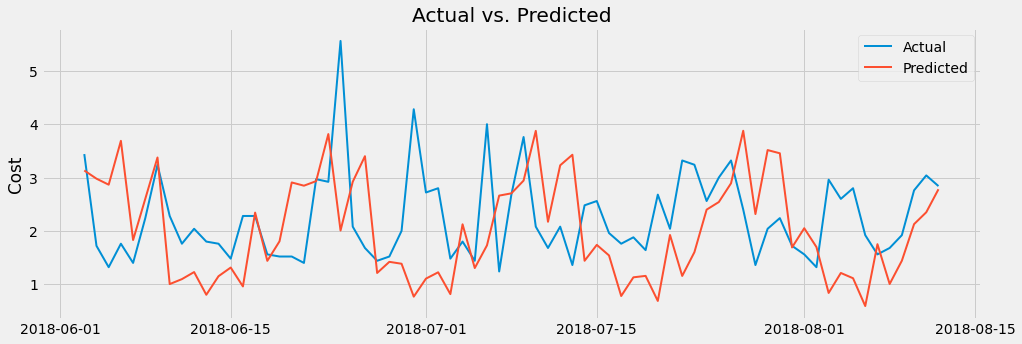

In [211]:
plt.figure(figsize=(15,5))
linewidth = 2
plt.plot(df_test[response_col].index, y_test, label='Actual', linewidth=linewidth)
plt.plot(df_test[response_col].index, y_pred_inverse, label='Predicted', linewidth=linewidth)
plt.title('Actual vs. Predicted')
plt.ylabel('Cost')
plt.legend();

In [210]:
(y_pred_inverse - y_test).sum()

-16.189539882838726